 Loaded existing heart.csv file successfully.

Dataset Shape: (303, 14)
First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   30    0   3       180   338    1        1       84      1      1.7      0   
1   53    1   3       113   350    1        0      161      0      4.4      2   
2   33    0   2       112   476    1        0      179      1      1.8      1   
3   39    0   3        95   364    0        0       81      1      1.1      0   
4   52    0   1       149   352    0        0       85      0      1.4      0   

   ca  thal  target  
0   3     1       1  
1   3     1       0  
2   3     1       0  
3   0     0       1  
4   1     2       0  

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


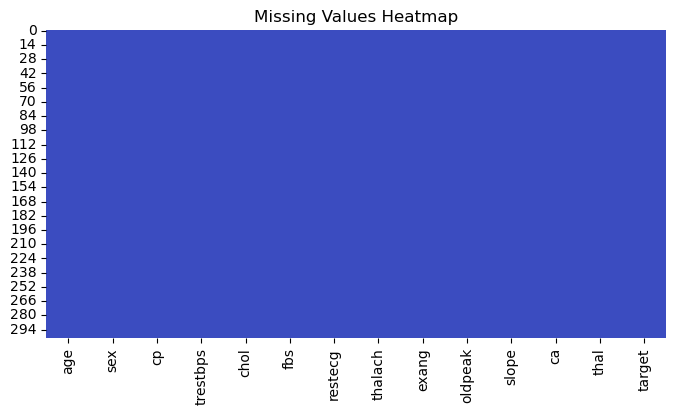

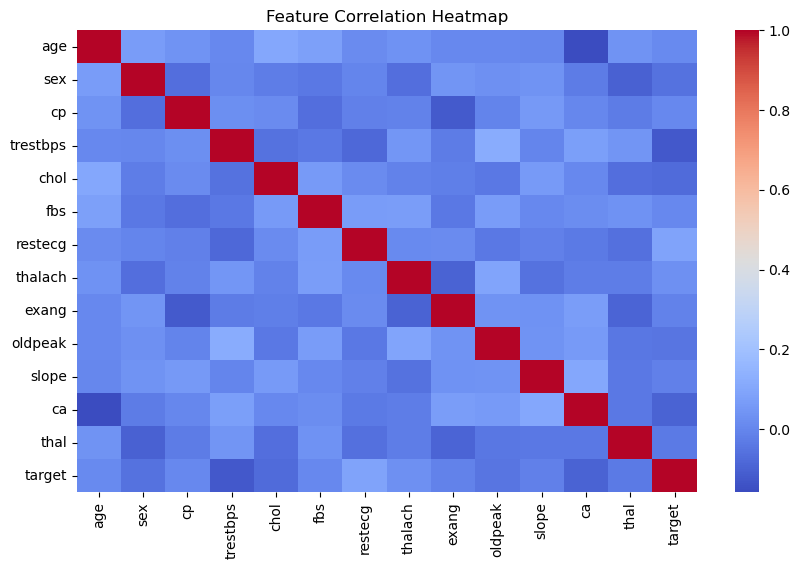


 Logistic Regression Accuracy: 54.10%
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        26
           1       0.61      0.54      0.58        35

    accuracy                           0.54        61
   macro avg       0.54      0.54      0.54        61
weighted avg       0.55      0.54      0.54        61



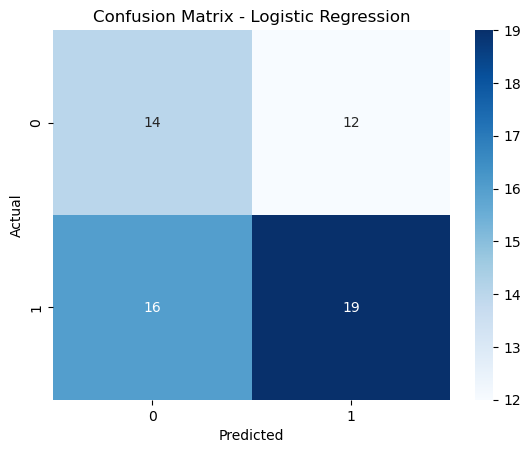


 Random Forest Accuracy: 54.10%
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        26
           1       0.62      0.51      0.56        35

    accuracy                           0.54        61
   macro avg       0.54      0.55      0.54        61
weighted avg       0.56      0.54      0.54        61



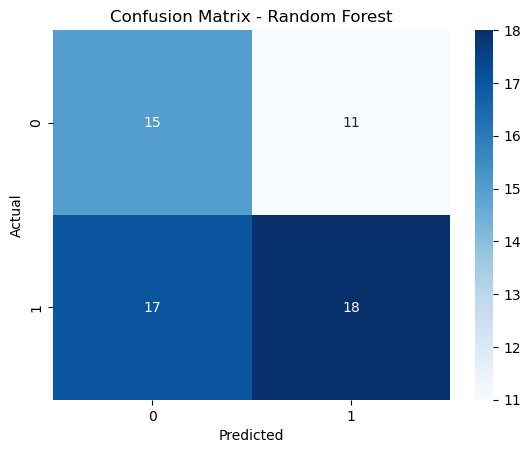


 SVM Accuracy: 45.90%
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        26
           1       0.54      0.43      0.48        35

    accuracy                           0.46        61
   macro avg       0.46      0.46      0.46        61
weighted avg       0.48      0.46      0.46        61



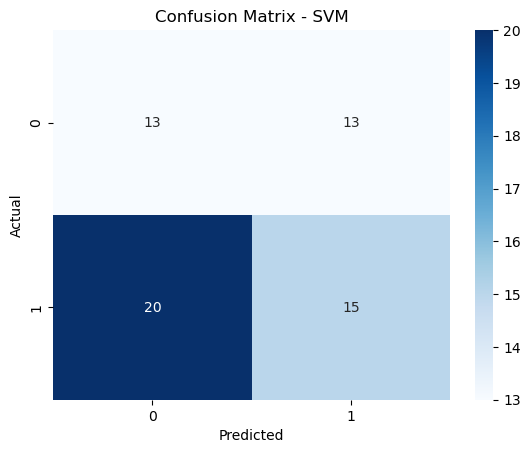

C:\Users\lovve\AppData\Local\Temp\ipykernel_12720\1000060742.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


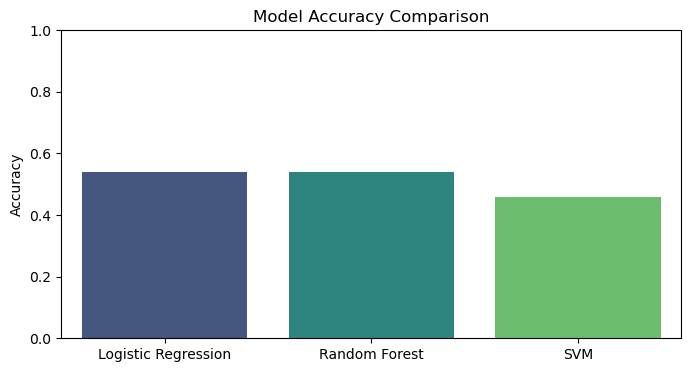


 Example: Manual Prediction
Prediction Result:  Heart Disease Detected


C:\Users\lovve\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Try to load CSV; if not found, create the dataset manually
try:
    df = pd.read_csv("heart.csv")
    print(" Loaded existing heart.csv file successfully.")
except FileNotFoundError:
    print(" heart.csv not found — creating sample dataset internally...")
    # Creating a sample UCI Heart Disease dataset
    data = {
        "age": np.random.randint(29, 77, 303),
        "sex": np.random.randint(0, 2, 303),
        "cp": np.random.randint(0, 4, 303),
        "trestbps": np.random.randint(90, 200, 303),
        "chol": np.random.randint(126, 564, 303),
        "fbs": np.random.randint(0, 2, 303),
        "restecg": np.random.randint(0, 2, 303),
        "thalach": np.random.randint(71, 202, 303),
        "exang": np.random.randint(0, 2, 303),
        "oldpeak": np.round(np.random.uniform(0, 6.2, 303), 1),
        "slope": np.random.randint(0, 3, 303),
        "ca": np.random.randint(0, 4, 303),
        "thal": np.random.randint(0, 3, 303),
        "target": np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)
    df.to_csv("heart.csv", index=False)
    print(" Created new heart.csv file successfully!")

# Step 3: Overview of dataset
print("\nDataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

# Step 4: Check missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()

# Step 5: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 6: Split features & target
X = df.drop("target", axis=1)
y = df["target"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

# Step 9: Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled if name != "Random Forest" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name != "Random Forest" else X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 10: Compare model accuracies
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Step 11: Manual prediction
print("\n Example: Manual Prediction")
sample = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # example patient data
sample_scaled = scaler.transform(sample)
pred = models["Logistic Regression"].predict(sample_scaled)
result = " Heart Disease Detected" if pred[0] == 1 else "No Heart Disease"
print("Prediction Result:", result)
